<h2>Variables that make sellers more successful than others.</h2>

Setting up environment

In [54]:
import os
from pathlib import Path
home = os.getcwd()
current = home
while 'mid' not in os.listdir(current):
    current = Path(current).parent
DATA_FOLDER = os.path.join(current, 'mid')

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sellers = pd.read_csv(os.path.join(DATA_FOLDER, 'olist_sellers_dataset.csv'))
order_items = pd.read_csv(os.path.join(DATA_FOLDER, 'olist_order_items_dataset.csv'))
orders = pd.read_csv(os.path.join(DATA_FOLDER, 'olist_orders_dataset.csv'))

In [56]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<h4>Location and delivery time</h4>

In [57]:
# olist_sellers_dataset.csv columns: seller_id, seller_state
# olist_order_items_dataset.csv columns: seller_id, order_id
# olist_orders_dataset.csv columns: order_id, duration

# Merge datasets
merged_data = pd.merge(sellers, order_items, on='seller_id')
merged_data = pd.merge(merged_data, orders, on='order_id')

merged_data["delivery_time"] = pd.to_datetime(merged_data["order_delivered_customer_date"]) - pd.to_datetime(merged_data["order_purchase_timestamp"])
merged_data["delivery_time"] = merged_data["delivery_time"].dt.total_seconds() / 3600
sampled_data = merged_data.sample(frac=0.002, random_state=42)
# Display merged_data to check if the merge was successful
merged_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,9d6837f9700a3441e7183bff3bc4eef0,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,211.524722
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,a973c4e3ad82777add3fa188f91dacea,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,672.754167
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,1554ffe702931a062b4383b109accf63,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,53.059444
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,9facbfd2dd51a45404d58154b12ed2dd,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00,270.539444
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,4e2c1f15de98416a90c2ee06b55ccc9b,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-02 19:33:19,2017-10-06 17:03:59,2017-11-03 00:00:00,189.533889


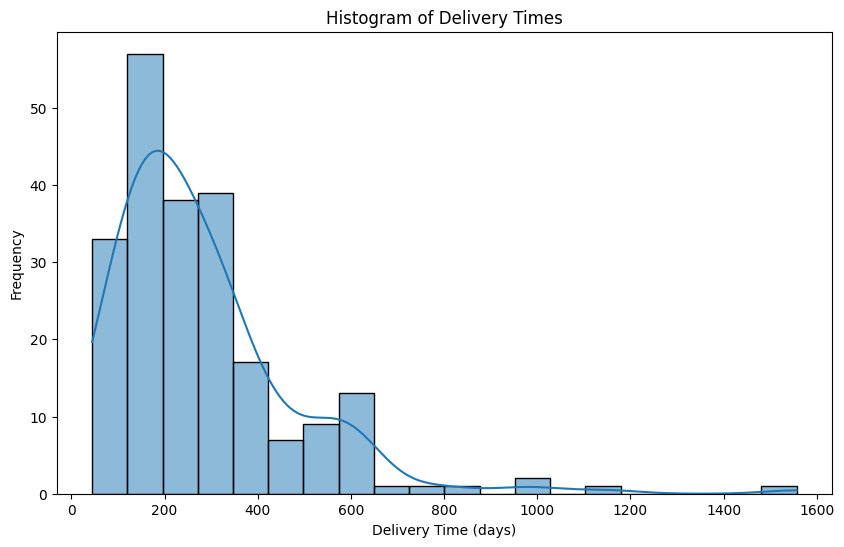

In [58]:
# Histogram of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(sampled_data['delivery_time'], bins=20, kde=True)
plt.title('Histogram of Delivery Times')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.show()


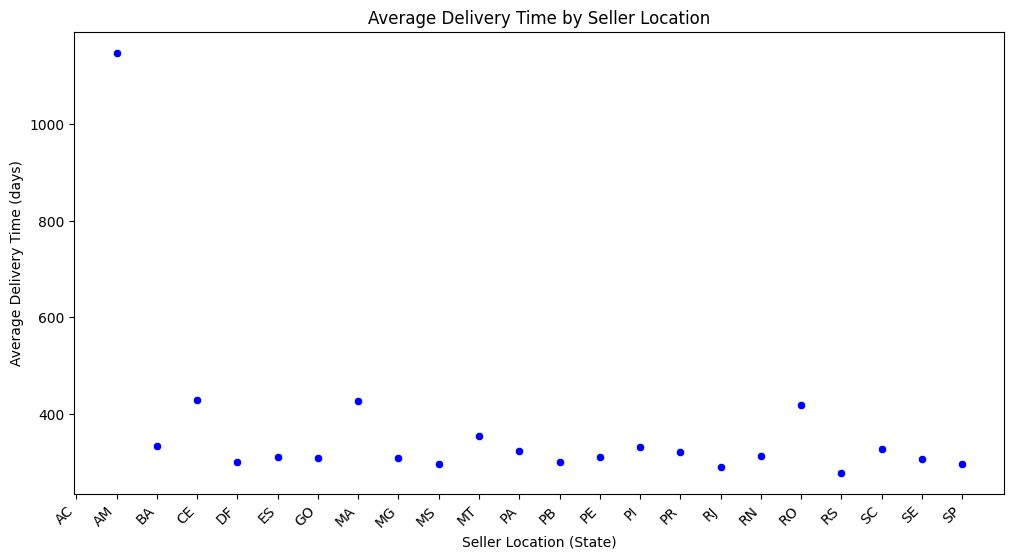

In [62]:
# Calculate the average delivery time for each seller
avg_delivery_time_by_state= merged_data.groupby('seller_state')['delivery_time'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='seller_state', y='delivery_time', data=avg_delivery_time_by_state, color='blue')
plt.title('Average Delivery Time by Seller Location')
plt.xlabel('Seller Location (State)')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Sellers in states: CE, MA, RO have a longer delivery time on average.

States with less sellers have longer delivery times

In [60]:
#Do some testing here

Order Processing Time:

Seasonal Variation in Sales: